### US_NR1_hillslope
First look at affects of elevation and aspect in a simple hillslope run for Boulder County forced with tower data from US-NR1.
- Created by Will Wieder wwieder@ucar.edu
- Created on 2 March, 2023

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import utils
import cftime
import nc_time_axis
import dask
#import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.pyplot import cm

# supress Runtime warnings that let you know when code isn't too efficiently
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
from distributed import wait

%matplotlib inline

In [2]:
# Niwot LTER  simulations
# H1 files dimensioned time x column or time x pft

## for moist meadow experiments
case  =  ['US-NR1_hh_test1_sp']
years = range(15,17)

rollHour = -12  

dirIn = ['/glade/scratch/wwieder/archive/'+case[c]+'/lnd/hist/' for c in range(len(case))]
#dirIn = ['/glade/scratch/wwieder/'+case[c]+'/run/' for c in range(len(case))]

dsIn = [dirIn[0] + case[0] +'.clm2.h1.00'+str(years[i]) +'-01-01-00000.nc' \
           for i in range(len(years)) ]  
dsIn

['/glade/scratch/wwieder/archive/US-NR1_hh_test1_sp/lnd/hist/US-NR1_hh_test1_sp.clm2.h1.0015-01-01-00000.nc',
 '/glade/scratch/wwieder/archive/US-NR1_hh_test1_sp/lnd/hist/US-NR1_hh_test1_sp.clm2.h1.0016-01-01-00000.nc']

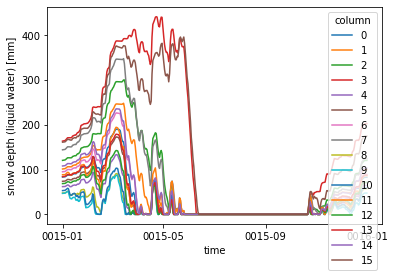

In [3]:
ds = xr.open_mfdataset(dsIn, decode_times=True, combine='by_coords')
ds.H2OSNO.isel(time=slice(0,365)).plot(hue='column') ;

**Aspect:**  (_ds.hslp_aspect.isel(time=0).values_)
- N = 0-3 
- E = 4-7  
- S = 8-11  
- W = 12-15 

**Elevation:**  (_ds.hslp_elev.isel(time=0).values_)
- Low 0, 4, 8, 12
- High 3, 7, 11, 15 

In [4]:
ds.hslp_elev.isel(time=0).values

array([4.98204853e-01, 2.80999193e+01, 9.69598783e+01, 2.60464459e+02,
       3.04513973e-01, 2.77913072e+01, 9.64188132e+01, 2.40037773e+02,
       2.08321475e-01, 2.75704132e+01, 9.66664849e+01, 2.68795007e+02,
       3.25363262e-01, 2.86769612e+01, 9.85421106e+01, 3.35079741e+02])

In [5]:
ds['aspect'] = ['N','N','N','N',
                'E','E','E','E',
                'S','S','S','S',
                'W','W','W','W']

ds['elevation'] = [1,2,3,4, 1,2,3,4,
                   1,2,3,4, 1,2,3,4]
#                   'lower montain','upper montaine','sub alpine','alpine',
#                   'lower montain','upper montaine','sub alpine','alpine',
#                   'lower montain','upper montaine','sub alpine','alpine']


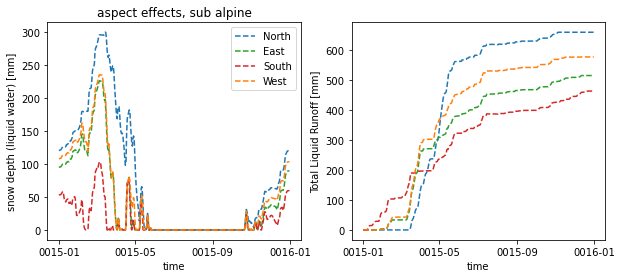

In [6]:
var = ['H2OSNO','QRUNOFF']
col = [2,6,10,14]
label=['North','East','South','West']
colors=['tab:blue','tab:green','tab:red','tab:orange']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=[10,4])

for v in range(len(var)):
    plt.subplot(1,2,(v+1))
    for c in range(len(col)):
        plotVar = ds[var[v]].isel(time=slice(0,365), column=col[c])
        if v == 0: 
            plotVar.plot(label=label[c], linestyle='--',color=colors[c])
            plt.title('aspect effects, sub alpine')
            plt.legend() 
        else:
            (plotVar*3600*24).cumsum().plot(label=label[c], linestyle='--',color=colors[c])
            plt.ylabel('Total Liquid Runoff [mm]');


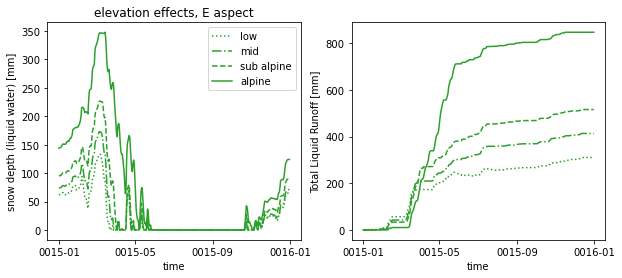

In [7]:
col = [4,5,6,7]
label=['low','mid','sub alpine','alpine']
lt = [':','-.','--','-']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=[10,4])

for v in range(len(var)):
    plt.subplot(1,2,(v+1))
    for c in range(len(col)):
        plotVar = ds[var[v]].isel(time=slice(0,365), column=col[c])
        if v == 0: 
            plotVar.plot(label=label[c], color=colors[1],linestyle=lt[c] )
            plt.title('elevation effects, E aspect')
            plt.legend() 
        else:
            (plotVar*3600*24).cumsum().plot(label=label[c],color=colors[1],linestyle=lt[c])
            plt.ylabel('Total Liquid Runoff [mm]');
        
        

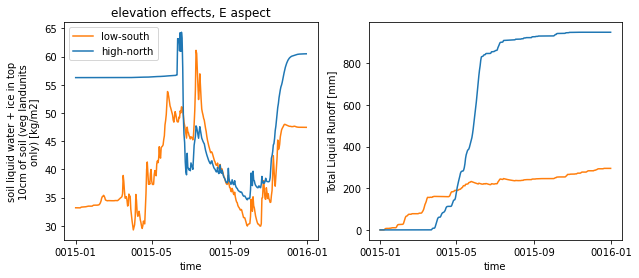

In [8]:
var = ['SOILWATER_10CM','QRUNOFF']

col = [8, 3]
label=['low-south', 'high-north']
colors=['tab:orange','tab:blue']
lt = ['-','-']
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=[10,4])

for v in range(len(var)):
    plt.subplot(1,2,(v+1))
    for c in range(len(col)):
        plotVar = ds[var[v]].isel(time=slice(0,365), column=col[c])
        if v == 0: 
            plotVar.plot(label=label[c], color=colors[c],linestyle=lt[c] )
            plt.title('elevation effects, E aspect')
            plt.legend() 
        else:
            (plotVar*3600*24).cumsum().plot(label=label[c],color=colors[c],linestyle=lt[c])
            plt.ylabel('Total Liquid Runoff [mm]');
        
        

## remap colums to DEM


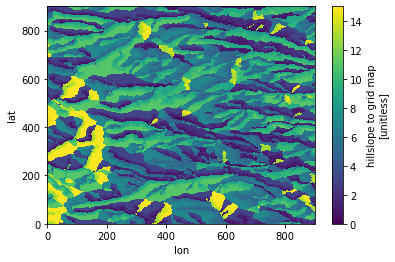

In [53]:
ds_grid = '/glade/scratch/wwieder/map_hillslope_to_grid_NR.nc'
ds_grid = xr.open_dataset(ds_grid)
ds_grid.hillslope_to_grid.plot() ;

In [54]:
ds.H2OSNO

<xarray.DataArray 'H2OSNO' (time: 730, column: 16)>
dask.array<concatenate, shape=(730, 16), dtype=float32, chunksize=(365, 16), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0015-01-01 00:00:00 ... 0016-12-31 00:00:00
Dimensions without coordinates: column
Attributes:
    long_name:     snow depth (liquid water)
    units:         mm
    cell_methods:  time: mean

In [55]:
ds_grid['H2OSNO'] = ds_grid.hillslope_to_grid
ds_grid['hh_grid'] = ds_grid.hillslope_to_grid.astype("int")

for i in range(len(ds.column)):
    ds_grid['H2OSNO'] = xr.where(ds_grid['hh_grid'] == i, ds.H2OSNO.isel(column=i), ds_grid['H2OSNO'])

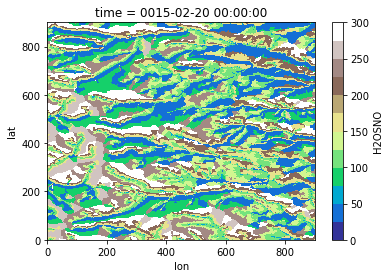

In [56]:
ds_grid['H2OSNO'].isel(time=50).plot(
    cmap='terrain',vmax=300,vmin=0,levels=13);

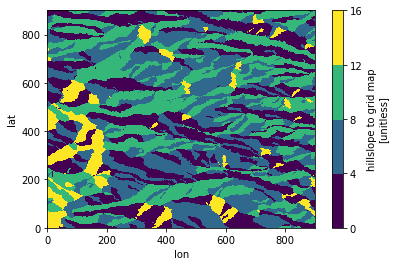

In [60]:
ds_grid.hillslope_to_grid.plot(levels=5) ;

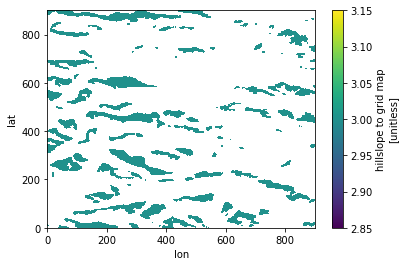

In [65]:
ds_grid.hillslope_to_grid.where(ds_grid.hillslope_to_grid==3).plot()

#### Quick look at LAI modifications for US-NR1

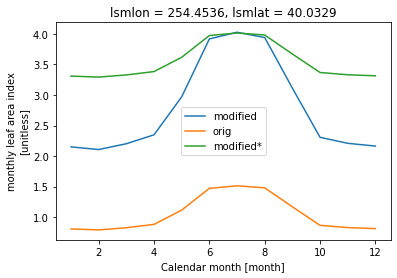

In [9]:
surDat = '/glade/scratch/wwieder/US-NR1_single_point_data/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_US-NR1_c220922.nc'
surDat2 = '/glade/scratch/wwieder/US-NR1_single_point_data/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_US-NR1_LAIx2.66.nc'
surDat3 = '/glade/scratch/wwieder/US-NR1_single_point_data/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_US-NR1_LAI+2.5.nc'
surDat = xr.open_dataset(surDat)
surDat2 = xr.open_dataset(surDat2)
surDat3 = xr.open_dataset(surDat3)
surDat2.MONTHLY_LAI.isel(lsmpft=1,lsmlat=0,lsmlon=0).plot(label='modified')
surDat.MONTHLY_LAI.isel(lsmpft=1,lsmlat=0,lsmlon=0).plot(label='orig');
surDat3.MONTHLY_LAI.isel(lsmpft=1,lsmlat=0,lsmlon=0).plot(label='modified*')
plt.legend();

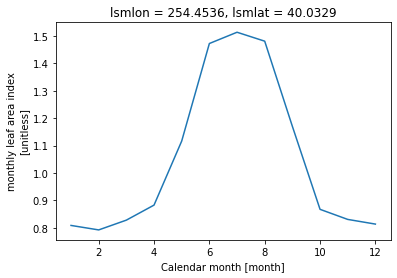

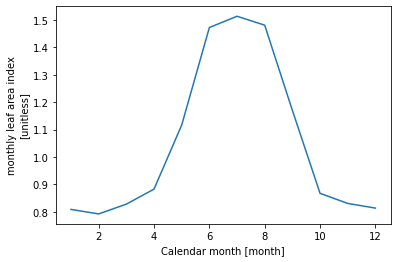

In [32]:
surDat = '/glade/p/cesmdata/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214.nc'
surDat = xr.open_dataset(surDat)
surDat.MONTHLY_LAI.sel(lsmlon=204,lsmlat=138,lsmpft=1).plot();

In [33]:
surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_US-NR1_c220922.nc surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_US-NR1_LAIx2.66.nc

2.6666666666666665